In [1]:
from __future__ import division
import numpy as np 
import mltools as ml
import math

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

## Decision Trees

In [ ]:
learner = ml.dtree.treeClassify(X, Y, minParent = 20, maxDepth=15, minLeaf = 64)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

## Classifier #2

In [ ]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

In [ ]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 150,150, 2], 'random', XtS, Yt) # as many layers nodes you want 
sig = lambda z: np.atleast_2d(z/(1 + abs(z)))
dsig = lambda z: np.atleast_2d(1/(1 + abs(z))**2)
nn.setActivation('htangent', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
Yte = np.vstack((np.arange(Xte.shape[0]), nn.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

## Classifier #3

In [ ]:
X0 = X[:10000]

In [ ]:
learner = ml.linearC.linearClassify()
learner.train(X0, Y, reg=0.9, initStep=0.01, stopTol=1e-6, stopIter=100)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

## Bagging Decision Trees

In [28]:
import numpy as np 
import pandas as pd

def bootstrap_resample(X, n=None):
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])  # TODO: write a test demonstrating why array() is important
    return X_resample

In [29]:
for x in range(3):
    Xnot = bootstrap_resample(X, n=None)
    learner = ml.dtree.treeClassify(X, Y, minParent = 20, maxDepth=15, minLeaf = 64)
    Yte = np.vstack((np.arange(Xnot.shape[0]), learner.predictSoft(Xnot)[:,1])).T
    np.savetxt('Y_tr'+str(x)+'.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')
    
for x in range(3):
    Xnot = bootstrap_resample(Xte, n=None)
    learner = ml.dtree.treeClassify(X, Y, minParent = 20, maxDepth=15, minLeaf = 64)
    Yte = np.vstack((np.arange(Xnot.shape[0]), learner.predictSoft(Xnot)[:,1])).T
    np.savetxt('Y_te'+str(x)+'.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')   

In [30]:
Ytr0 = np.genfromtxt('Y_tr0.txt', skip_header=1, delimiter=None)
Ytr1 = np.genfromtxt('Y_tr1.txt', skip_header=1, delimiter=None)
Ytr2 = np.genfromtxt('Y_tr2.txt', skip_header=1, delimiter=None)

Yte0 = np.genfromtxt('Y_te0.txt', skip_header=1, delimiter=None)
Yte1 = np.genfromtxt('Y_te1.txt', skip_header=1, delimiter=None)
Yte2 = np.genfromtxt('Y_te2.txt', skip_header=1, delimiter=None)

In [31]:
Ytrhat = np.ones_like(Ytr1)
for x in range(len(Ytr1)):
    Ytrhat[x][0] = int(x)
    if(Ytr0[x][1] == Ytr2[x][1]):
        Ytrhat[x][1] = Ytr0[x][1]
    else:
        Ytrhat[x][1] = Ytr1[x][1]
np.savetxt('Yhat_train.txt', Ytehat, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

Ytehat = np.ones_like(Yte1)
for x in range(len(Yte1)):
    Ytehat[x][0] = int(x)
    if(Yte0[x][1] == Yte2[x][1]):
        Ytehat[x][1] = Yte0[x][1]
    else:
        Ytehat[x][1] = Yte1[x][1]
        
np.savetxt('Y_submit.txt', Ytehat, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

TRAINING


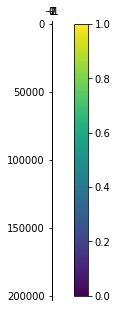

In [33]:
print("TRAINING")
Y_tr = np.genfromtxt('Yhat_train.txt', skip_header=1, delimiter=None)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(Y_tr, interpolation='nearest') 
f.colorbar(cax)
plt.show()

TESTING


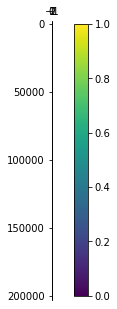

In [34]:
print("TESTING")
Y_te = np.genfromtxt('Y_submit.txt', skip_header=1, delimiter=None)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(Y_te, interpolation='nearest') 
f.colorbar(cax)
plt.show()

In [18]:
Y.shape

(200000L,)